## Observations and Insights 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = mouse_metadata.merge(study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_df.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [59]:
# Check the number of mice.
len(mouse_study_df['Mouse ID'].unique())

249

In [60]:
# Drop duplicate Timepoint values for each Mouse ID, done in place 
mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], inplace=True)

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groups = mouse_study_df.groupby(['Drug Regimen'])

summary_df = pd.DataFrame({'Mean': drug_groups['Tumor Volume (mm3)'].mean(),
                           'Median': drug_groups['Tumor Volume (mm3)'].median(),
                           'Variance': drug_groups['Tumor Volume (mm3)'].var(),
                           'Standard Deviation': drug_groups['Tumor Volume (mm3)'].std(),
                           'SEM': drug_groups['Tumor Volume (mm3)'].sem()
                          })
summary_df.rename_axis('Tumor Volume (mm3)')

,Mean,Median,Variance,Standard Deviation,SEM
Tumor Volume (mm3),,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

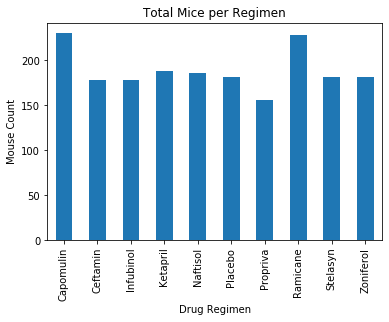

In [70]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
pd_bar_chart = drug_groups['Mouse ID'].count().plot.bar(title='Total Mice per Regimen', y='Mouse Count').set_ylabel('Mouse Count')

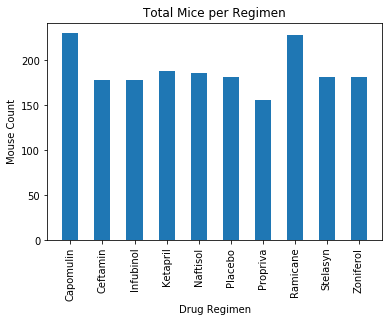

In [82]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Count')
plt.title('Total Mice per Regimen')
plot_bar_chart = plt.bar(drug_groups.count().index, drug_groups['Mouse ID'].count(), width=0.5)


In [ ]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

## Note: this plot will be identical to the one that uses Pyplot

In [ ]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
